## Notebook for the study of the E.Coli Core model

#### Importation of the module

In [1]:
import sys
sys.path.append('../')

from main import *

In [2]:
model = MODEL()

SBTab_file = "../Exemples/SBTab/Model.tsv"

model.read_SBtab(filepath=SBTab_file)

At this actual state, only the structure of the network is here
So we have to add parameters in the model and complete the elasticity matrix

In [3]:
model.enzymes.add_to_all_reaction()
model.parameters.add_enzymes()

model.parameters.add_externals()

model.elasticity.s.half_satured()

model.parameters.remove("Temperature")

Name of the removed parameter : Temperature


We can display the reference state in a Escher map

In [4]:
model_path = "../Exemples/SBTab/e_coli_core_model.json"
map_path = "../Exemples/SBTab/e_coli_core_map.json"

In [5]:
model.escher_reference(model_json=model_path, map_json=map_path)

Builder(height=600, metabolite_data={'acald_c': 0.95062685, 'coa_c': 2.74, 'nad_c': 4.2256266, 'accoa_c': 1.21…

Then we can add an enzyme linked to every reactions

In [6]:
model.enzymes.add_to_all_reaction()
model.parameters.add_enzymes()

Then is it possible to get the covarience matrix

In [7]:
model.covariance

,enzyme_ACALD_para,enzyme_ACALDt_para,enzyme_ACKr_para,enzyme_ACONTa_para,enzyme_ACONTb_para,enzyme_ACt2r_para,enzyme_ADK1_para,enzyme_AKGDH_para,enzyme_ATPM_para,enzyme_Biomass_Ecoli_core_w_GAM_para,...,PYK,RPE,RPI,SUCCt2_2,SUCCt3,SUCOAS,TALA,TKT1,TKT2,TPI
enzyme_ACALD_para,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.062779,-0.014417,0.005934,-0.003991,0.083508,-0.001756,-0.006996,-0.006996,-0.007421,-0.020814
enzyme_ACALDt_para,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.062779,-0.014417,0.005934,-0.003991,0.083508,-0.001756,-0.006996,-0.006996,-0.007421,-0.020814
enzyme_ACKr_para,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.017093,-0.001314,0.004205,-0.062136,0.025203,-0.028208,-0.001248,-0.001248,-0.000065,-0.009858
enzyme_ACONTa_para,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.016007,-0.030362,0.016319,-0.021643,0.063011,-0.028278,-0.015371,-0.015371,-0.014991,0.007868
enzyme_ACONTb_para,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.016007,-0.030362,0.016319,-0.021643,0.063011,-0.028278,-0.015371,-0.015371,-0.014991,0.007868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SUCOAS,-0.001756,-0.001756,-0.028208,-0.028278,-0.028278,-0.028208,-0.021340,-0.167113,-0.010717,-0.001188,...,0.031741,0.025874,-0.011697,0.004137,-0.024458,0.168403,0.012730,0.012730,0.013144,-0.006650
TALA,-0.006996,-0.006996,-0.001248,-0.015371,-0.015371,-0.001248,-0.008713,-0.012416,-0.014401,0.000498,...,0.002810,0.029567,-0.015376,0.003889,0.004916,0.012730,0.014882,0.014882,0.014685,-0.004872
TKT1,-0.006996,-0.006996,-0.001248,-0.015371,-0.015371,-0.001248,-0.008713,-0.012416,-0.014401,0.000498,...,0.002810,0.029567,-0.015376,0.003889,0.004916,0.012730,0.014882,0.014882,0.014685,-0.004872
TKT2,-0.007421,-0.007421,-0.000065,-0.014991,-0.014991,-0.000065,-0.007049,-0.012844,-0.009793,0.000317,...,0.004118,0.029240,-0.015007,0.003864,0.005538,0.013144,0.014685,0.014685,0.014556,-0.005425


In [8]:
df = model.covariance

# Trouver l'indice de ligne et la colonne avec la valeur maximale
max_value_index = df.values.argmax()
max_row, max_col = divmod(max_value_index, len(df.columns))
max_value = df.values.max()


# Afficher les résultats
print("La combinaison d'indice de ligne et de colonne avec la plus grande valeur est :")
print("Ligne :", df.index[max_row])
print("Colonne :", df.columns[max_col])
print("Valeur maximale :", max_value)

La combinaison d'indice de ligne et de colonne avec la plus grande valeur est :
Ligne : gln_c
Colonne : gln_c
Valeur maximale : 45.27413660472858


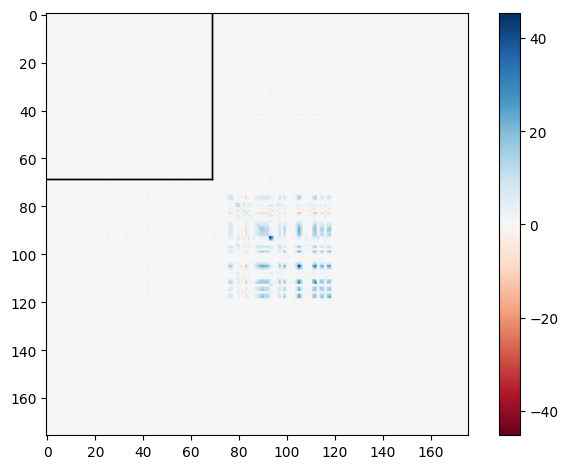

(<Figure size 640x480 with 2 Axes>,
 <AxesSubplot: >,
 <matplotlib.image.AxesImage at 0x7fde8b3b6200>)

In [9]:
model.plot(result="cov")

And then decuce the correlation between each elements of the model

In [10]:
model.rho()

,enzyme_ACALD_para,enzyme_ACALDt_para,enzyme_ACKr_para,enzyme_ACONTa_para,enzyme_ACONTb_para,enzyme_ACt2r_para,enzyme_ADK1_para,enzyme_AKGDH_para,enzyme_ATPM_para,enzyme_Biomass_Ecoli_core_w_GAM_para,...,PYK,RPE,RPI,SUCCt2_2,SUCCt3,SUCOAS,TALA,TKT1,TKT2,TPI
enzyme_ACALD_para,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.090530,-0.059450,0.046481,-0.005857,0.128324,-0.004279,-0.057348,-0.057348,-0.061509,-0.097793
enzyme_ACALDt_para,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.090530,-0.059450,0.046481,-0.005857,0.128324,-0.004279,-0.057348,-0.057348,-0.061509,-0.097793
enzyme_ACKr_para,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.024649,-0.005417,0.032941,-0.091192,0.038729,-0.068737,-0.010232,-0.010232,-0.000542,-0.046318
enzyme_ACONTa_para,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.023083,-0.125204,0.127829,-0.031764,0.096826,-0.068908,-0.125998,-0.125998,-0.124259,0.036967
enzyme_ACONTb_para,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.023083,-0.125204,0.127829,-0.031764,0.096826,-0.068908,-0.125998,-0.125998,-0.124259,0.036967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SUCOAS,-0.004279,-0.004279,-0.068737,-0.068908,-0.068908,-0.068737,-0.052001,-0.407225,-0.026117,-0.002895,...,0.111536,0.260003,-0.223274,0.014794,-0.091586,1.000000,0.254294,0.254294,0.265479,-0.076139
TALA,-0.057348,-0.057348,-0.010232,-0.125998,-0.125998,-0.010232,-0.071423,-0.101779,-0.118046,0.004082,...,0.033216,0.999440,-0.987290,0.046781,0.061923,0.254294,1.000000,1.000000,0.997735,-0.187627
TKT1,-0.057348,-0.057348,-0.010232,-0.125998,-0.125998,-0.010232,-0.071423,-0.101779,-0.118046,0.004082,...,0.033216,0.999440,-0.987290,0.046781,0.061923,0.254294,1.000000,1.000000,0.997735,-0.187627
TKT2,-0.061509,-0.061509,-0.000542,-0.124259,-0.124259,-0.000542,-0.058429,-0.106460,-0.081170,0.002624,...,0.049218,0.999427,-0.974363,0.047001,0.070541,0.265479,0.997735,0.997735,1.000000,-0.211276


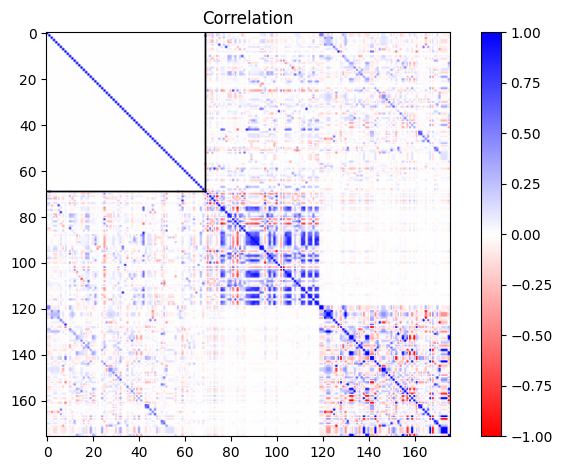

(<Figure size 640x480 with 2 Axes>,
 <AxesSubplot: title={'center': 'Correlation'}>,
 <matplotlib.image.AxesImage at 0x7fde8995f520>)

In [11]:
model.plot(result="rho")

and the mutual information

/home/alequertier/Documents/BadAss/Notebooks/../main.py:610: RuntimeWarning: invalid value encountered in log
  MI[i][j] = -0.5 * np.log(1 - self.__correlation[i][j] ** 2)


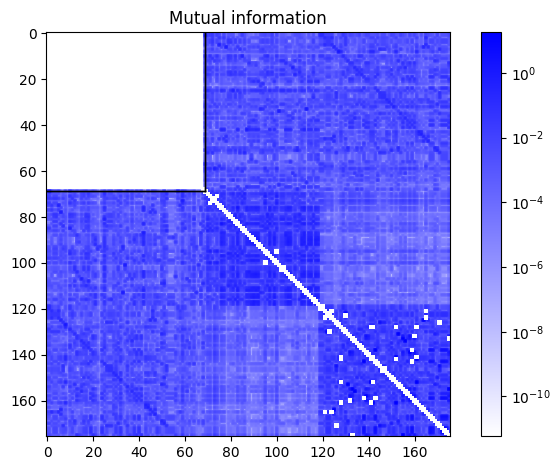

(<Figure size 640x480 with 2 Axes>,
 <AxesSubplot: title={'center': 'Mutual information'}>,
 <matplotlib.image.AxesImage at 0x7fde8989d210>)

In [12]:
model.plot(result="MI")

For a clearer analysis, you can display an Escher map of the mutual inforamtion between an element of the model and the metabolite

In [13]:
model.escher_meta(studied="enzyme_ACALD_para", result="MI", model_json=model_path, map_json=map_path)

Builder(height=600, metabolite_data={'acald_c': 0.05109644298378163, 'coa_c': 0.007639620877051339, 'nad_c': 0…

You can study the influence of the resolution of uncertainty of an element of the model by fixing its value

In [14]:
SD, mean = model.group_entropy_fixed_vector(elements_to_fixe="atp_c", elements_to_study=[], new_mean_fixed=4.0, return_all=True)

SD

,Old SD,New SD,Delta SD
enzyme_ACALD_para,1.000000,0.999984,0.000016
enzyme_ACALDt_para,1.000000,0.999984,0.000016
enzyme_ACKr_para,1.000000,0.998121,0.001879
enzyme_ACONTa_para,1.000000,0.999965,0.000035
enzyme_ACONTb_para,1.000000,0.999965,0.000035
...,...,...,...
SUCOAS,0.410369,0.410301,0.000068
TALA,0.121993,0.121929,0.000064
TKT1,0.121993,0.121929,0.000064
TKT2,0.120647,0.120592,0.000054


In [15]:
model.group_entropy_fixed_vector(elements_to_fixe=["atp_c"], elements_to_study=[], new_mean_fixed=[4.0])

-inf

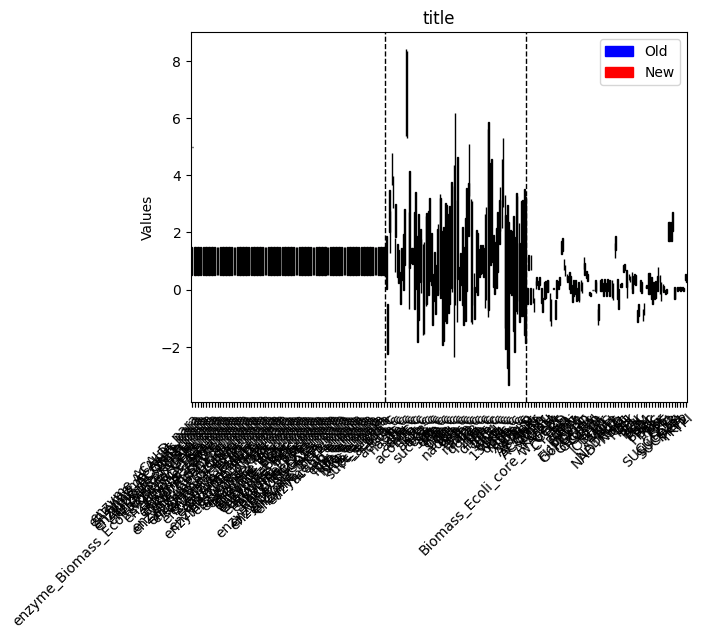

In [16]:
model.graphic_interface()

In [17]:
model.escher_mean_deviation(fixed_element="atp_c", fixed_value=4.0, model_json=model_path, map_json=map_path)

Builder(height=600, metabolite_data={'acald_c': -0.09030544228385509, 'coa_c': 0.633502477547559, 'nad_c': -0.…

### We can also regroup enzyme into operon

In [18]:
enzyme_gly = ["PFK", "FBA", "TPI", "GAPD", "PGK", "PGM", "PYK"]

for i in range(len(enzyme_gly)) :
    enzyme_gly[i] = "enzyme_" + enzyme_gly[i]

model.operons.add(name="Glycolyse", enzymes_linked=enzyme_gly , mixed_covariance=0.5)


enzyme_phosphate = ["G6PDH2r", "GND", "TALA", "TKT2"]

for i in range(len(enzyme_phosphate)) :
    enzyme_phosphate[i] = "enzyme_" + enzyme_phosphate[i]

model.operons.add(name="pentose phosphate", enzymes_linked=enzyme_phosphate , mixed_covariance=0.5)

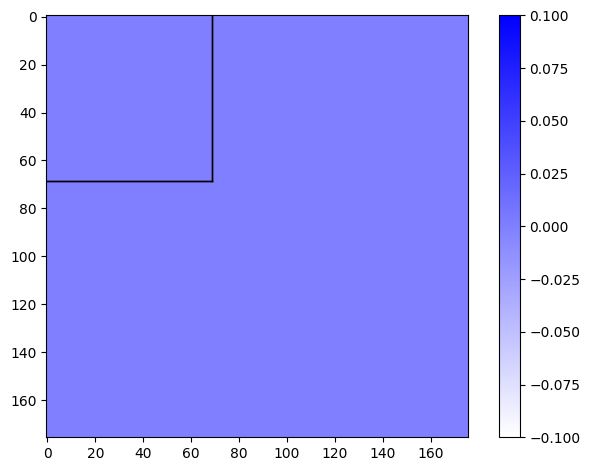

In [19]:
rho_0 = model.rho().to_numpy()

model.operons.desactivate("Glycolyse")
model.operons.desactivate("pentose phosphate")

rho_1 = model.rho().to_numpy()

index = columns = model.covariance.index
matrix = rho_0 - rho_1

mini = np.min(matrix)
maxi = np.max(matrix)
fig, ax = plt.subplots()

custom_map = matplotlib.colors.LinearSegmentedColormap.from_list("custom", ["white", "blue"])
im = plt.imshow(np.abs(matrix), cmap=custom_map, vmin=0, vmax=maxi)
fig.tight_layout()

# Plot of the black line to separate the parameters from the variables
# Width of the line
line_width = 1
# Number of parameters
N_para = model.parameters.df.shape[0]
# Position of the line
x_p_e = [-0.5, N_para - 0.5]
y_p_e = [N_para - 0.5, N_para - 0.5]
plt.plot(x_p_e, y_p_e, "black", linewidth=line_width)
plt.plot(y_p_e, x_p_e, "black", linewidth=line_width)

x_p = [-0.5, N_para - 0.5]
y_p = [N_para - 0.5, N_para - 0.5]
plt.plot(x_p, y_p, "black", linewidth=line_width)
plt.plot(y_p, x_p, "black", linewidth=line_width)

plt.colorbar()
plt.show()


In [20]:
model.test_real_data()

In [21]:
model.similarity()

175.28587365543868